### Assessing a diabetes prediction classifier

In [1]:
# Import confusion matrix and classification report
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import RandomizedSearchCV, KFold

# Load the dataset
diabetes_df = pd.read_csv("../01_Supervised_Learning/Data/diabetes_clean.csv")

# Create features and target
X = diabetes_df.drop("diabetes", axis=1).values
y = diabetes_df["diabetes"].values

# Split the data into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Instantiate the model
knn = KNeighborsClassifier(n_neighbors=6)

# Fit the model to the training data
knn.fit(X_train, y_train)

# Predict the labels of the test set
y_pred = knn.predict(X_test)

# Generate the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[124  27]
 [ 42  38]]
              precision    recall  f1-score   support

           0       0.75      0.82      0.78       151
           1       0.58      0.47      0.52        80

    accuracy                           0.70       231
   macro avg       0.67      0.65      0.65       231
weighted avg       0.69      0.70      0.69       231



### Building a logistic regression model

In [2]:
# Import LogisticRegression
from sklearn.linear_model import LogisticRegression

# Instantiate the model
logreg = LogisticRegression(max_iter=1000)  # ensure convergence

# Fit the model
logreg.fit(X_train, y_train)

# Predict probabilities
y_pred_probs = logreg.predict_proba(X_test)[:, 1]

print(y_pred_probs[:10])

[0.26663489 0.19015712 0.12362321 0.14565039 0.50451399 0.45338235
 0.01328779 0.59630278 0.56320569 0.79989063]


### The ROC curve

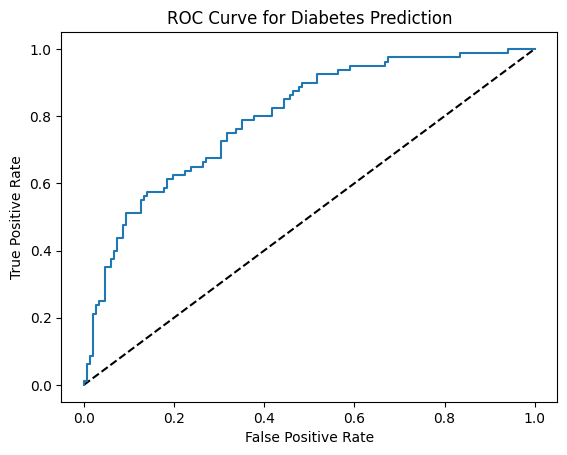

In [3]:
# Import roc_curve
from sklearn.metrics import roc_curve

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)

plt.plot([0, 1], [0, 1], 'k--')  # Diagonal reference line

# Plot tpr against fpr
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Diabetes Prediction')
plt.show()

### ROC AUC

In [4]:
# Import roc_auc_score
from sklearn.metrics import roc_auc_score

# Calculate roc_auc_score
print("ROC AUC Score:", roc_auc_score(y_test, y_pred_probs))

# Calculate the confusion matrix
print(confusion_matrix(y_test, y_pred))

# Calculate the classification report
print(classification_report(y_test, y_pred))

ROC AUC Score: 0.7963576158940396
[[124  27]
 [ 42  38]]
              precision    recall  f1-score   support

           0       0.75      0.82      0.78       151
           1       0.58      0.47      0.52        80

    accuracy                           0.70       231
   macro avg       0.67      0.65      0.65       231
weighted avg       0.69      0.70      0.69       231



### Hyperparameter tuning with GridSearchCV

In [ ]:
# Import GridSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

# Create KFold object
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Create and fit a Lasso model to get started
lasso = Lasso()

# Set up the parameter grid
param_grid = {"alpha": np.linspace(0.00001, 1, 20)}

# Instantiate lasso_cv
lasso_cv = GridSearchCV(lasso, param_grid, cv=kf)

# Fit to the training data
lasso_cv.fit(X_train, y_train)

print("Tuned lasso paramaters: {}".format(lasso_cv.best_params_))
print("Tuned lasso score: {}".format(lasso_cv.best_score_))


Tuned lasso paramaters: {'alpha': 1e-05}
Tuned lasso score: 0.29604708033272703


### Hyperparameter tuning with RandomizedSearchCV

In [7]:
# Instantiate the model with compatible solver
logreg = LogisticRegression(solver='liblinear', max_iter=1000)

# Create the parameter space
params = {
    "penalty": ["l1", "l2"],  # Now both are valid
    "tol": np.linspace(0.0001, 1.0, 50),
    "C": np.linspace(0.1, 1.0, 50),
    "class_weight": ["balanced", {0: 0.8, 1: 0.2}]
}

# Instantiate the RandomizedSearchCV object
logreg_cv = RandomizedSearchCV(logreg, params, cv=kf, n_iter=20, random_state=42)

# Fit the data to the model
logreg_cv.fit(X_train, y_train)

# Print the tuned parameters and score
print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_))
print("Tuned Logistic Regression Best Accuracy Score: {}".format(logreg_cv.best_score_))


Tuned Logistic Regression Parameters: {'tol': 0.4082224489795918, 'penalty': 'l1', 'class_weight': 'balanced', 'C': 0.6877551020408164}
Tuned Logistic Regression Best Accuracy Score: 0.7430079612322603
